In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Cargar datos del excel

df = pd.read_csv('https://drive.google.com/uc?id=1HE95YCW-Ypg971nJTOwXiM3E0R7hkghG', encoding='cp1252', delimiter=';')

df.head()
df

,FECHA_CORTE,NRO_REPORTE,FECHA_ACC,HORA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,LATITUD,LONGITUD,PROGRESIVA,CODIGO_VIA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20211130,001.01-001.2020 SC,20200101,23:40:00,CHOQUE,0,0,-15.456740,-74.866607,521.00,PE-1S,AREQUIPA,CARAVELI,LOMAS
1,20211130,002.01-002.2020 CC,20200101,07:45:00,DESPISTE,0,1,-10.824119,-76.199915,103.10,PE-3N,PASCO,PASCO,VICCO
2,20211130,004.01-004.2020 CC,20200101,06:20:00,CHOQUE,0,2,-9.531989,-77.531930,16.00,NaN,ANCASH,HUARAZ,HUARAZ
3,20211130,036.01-036.2020 CC,20200101,02:30:00,DESPISTE,0,2,-5.903333,-78.161667,263.80,PE-5N,AMAZONAS,UTCUBAMBA,JAMALCA
4,20211130,005.01-005.2020 CC,20200102,00:40:00,CHOQUE,2,6,-10.201361,-78.050778,275.00,PE-1N,ANCASH,HUARMEY,HUARMEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,20211130,7121002195 CC,20211130,20:15:00,CHOQUE,0,1,-16.567602,-72.626707,863.31,PE-1S,AREQUIPA,CAMANA,SAMUEL PASTOR
3828,20211130,7121002197 CC,20211130,00:00:00,VOLCADURA,1,1,-13.527485,-73.182984,65.00,AP-100,APURIMAC,ANDAHUAYLAS,KISHUARA
3829,20211130,7121002198 SC,20211130,22:40:00,DESPISTE,0,0,-13.127046,-76.393172,146.80,PE-1S,LIMA,CAÑETE,SAN VICENTE DE CAÑETE
3830,20211130,7121002199 CC,20211130,18:00:00,ACCIDENTE,1,0,-6.420472,-77.872722,283.30,PE-08B,AMAZONAS,CHACHAPOYAS,MAGDALENA


In [4]:
# DROP_COLUMNS = ['FECHA_CORTE', 'NRO_REPORTE', 'FECHA_ACC', 'HORA_ACC', 'PROGRESIVA','CODIGO_VIA']
# # Mostrar las primeras filas del DataFrame
# df.head()

# Corregir la lista de columnas a eliminar
DROP_COLUMNS = ['FECHA_CORTE', 'NRO_REPORTE','LATITUD','LONGITUD','PROGRESIVA','DEPARTAMENTO','PROVINCIA','DISTRITO']

# Eliminar las columnas especificadas
df.drop(DROP_COLUMNS, axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame
df

,FECHA_ACC,HORA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA
0,20200101,23:40:00,CHOQUE,0,0,PE-1S
1,20200101,07:45:00,DESPISTE,0,1,PE-3N
2,20200101,06:20:00,CHOQUE,0,2,NaN
3,20200101,02:30:00,DESPISTE,0,2,PE-5N
4,20200102,00:40:00,CHOQUE,2,6,PE-1N
...,...,...,...,...,...,...
3827,20211130,20:15:00,CHOQUE,0,1,PE-1S
3828,20211130,00:00:00,VOLCADURA,1,1,AP-100
3829,20211130,22:40:00,DESPISTE,0,0,PE-1S
3830,20211130,18:00:00,ACCIDENTE,1,0,PE-08B


In [5]:
# convertir datos de hora a texto por tunos (mañana, tarde y noche)
turnos = {
    'mañana': 1,
    'tarde': 2,
    'noche': 3
}
def convertir_hora_a_turnos(hora):
    if hora >= pd.to_datetime('20:00:00').time() or hora < pd.to_datetime('06:00:00').time():
        return turnos['noche']
    elif hora >= pd.to_datetime('06:00:00').time() and hora < pd.to_datetime('12:00:00').time():
        return turnos['mañana']
    else:
        return turnos['tarde']

# Aplicar la función a la columna de horas
df['TURNOS_ACC'] = df['HORA_ACC'].apply(lambda x: convertir_hora_a_turnos(pd.to_datetime(x).time()))

# Guardar el resultado en un nuevo archivo csv
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)


In [6]:
# mostrar dataframe cuando aparece la columna "HORA_ACC" y "TURNO_ACC"
df

,FECHA_ACC,HORA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,20200101,23:40:00,CHOQUE,0,0,PE-1S,3
1,20200101,07:45:00,DESPISTE,0,1,PE-3N,1
2,20200101,06:20:00,CHOQUE,0,2,NaN,1
3,20200101,02:30:00,DESPISTE,0,2,PE-5N,3
4,20200102,00:40:00,CHOQUE,2,6,PE-1N,3
...,...,...,...,...,...,...,...
3827,20211130,20:15:00,CHOQUE,0,1,PE-1S,3
3828,20211130,00:00:00,VOLCADURA,1,1,AP-100,3
3829,20211130,22:40:00,DESPISTE,0,0,PE-1S,3
3830,20211130,18:00:00,ACCIDENTE,1,0,PE-08B,2


In [7]:
# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/accidentes_transformado.csv')

# Corregir la lista de columnas a eliminar
DROP_COLUMNS = ['HORA_ACC']

# Eliminar las columnas especificadas
df.drop(DROP_COLUMNS, axis=1, inplace=True)
df.head()
df

# Persistir la eliminación de columnas
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

In [8]:
# Eliminar filas con CODIGO_VIA inexistente
df.dropna(subset='CODIGO_VIA', inplace=True)

# Persistir eliminación
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,20200101,CHOQUE,0,0,PE-1S,3
1,20200101,DESPISTE,0,1,PE-3N,1
3,20200101,DESPISTE,0,2,PE-5N,3
4,20200102,CHOQUE,2,6,PE-1N,3
6,20200102,DESPISTE,2,16,PE-1SJ,2
...,...,...,...,...,...,...
3827,20211130,CHOQUE,0,1,PE-1S,3
3828,20211130,VOLCADURA,1,1,AP-100,3
3829,20211130,DESPISTE,0,0,PE-1S,3
3830,20211130,ACCIDENTE,1,0,PE-08B,2


In [9]:
# Extraer códigos de via unicos
codigos_via_unicos = set(df['CODIGO_VIA'])

# Construir diccionario de códigos de via
codigos_via = { cod: i + 1 for i, cod in enumerate(codigos_via_unicos) }
pd.Series(codigos_via)

AR-115      1
PE-34C      2
PE-06B      3
PE-34G      4
PE-16       5
         ... 
PA-558    175
PE-1NK    176
PU-130    177
PE-28G    178
CU-107    179
Length: 179, dtype: int64

In [10]:
# Transformar CODIGO_VIA a un valor numérico
df['CODIGO_VIA'] = df['CODIGO_VIA'].apply(lambda cod: codigos_via[cod])

# Persistir transformación
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,20200101,CHOQUE,0,0,35,3
1,20200101,DESPISTE,0,1,79,1
3,20200101,DESPISTE,0,2,85,3
4,20200102,CHOQUE,2,6,164,3
6,20200102,DESPISTE,2,16,90,2
...,...,...,...,...,...,...
3827,20211130,CHOQUE,0,1,35,3
3828,20211130,VOLCADURA,1,1,89,3
3829,20211130,DESPISTE,0,0,35,3
3830,20211130,ACCIDENTE,1,0,46,2


In [11]:
# extraer modalidades
modalidades_unicas = set(df['MODALIDAD_ACC'])

# Construir diccionario de modalidades
modalidades = { mod: i for i, mod in enumerate(modalidades_unicas) }
pd.Series(modalidades)

ACCIDENTE    0
DESPISTE     1
INCENDIO     2
EMBISTE      3
ATROPELLO    4
VOLCADURA    5
ESPECIAL     6
CHOQUE       7
dtype: int64

In [12]:
# Transformar MODALIDAD_ACC a un valor numérico
df['MODALIDAD_ACC'] = df['MODALIDAD_ACC'].apply(lambda mod: modalidades[mod])

# Persistir transformación
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,20200101,7,0,0,35,3
1,20200101,1,0,1,79,1
3,20200101,1,0,2,85,3
4,20200102,7,2,6,164,3
6,20200102,1,2,16,90,2
...,...,...,...,...,...,...
3827,20211130,7,0,1,35,3
3828,20211130,5,1,1,89,3
3829,20211130,1,0,0,35,3
3830,20211130,0,1,0,46,2


In [13]:
# Convertir la columna FECHA_ACC a formato datetime

df['FECHA_ACC'] = pd.to_datetime(df['FECHA_ACC'], format='%Y%m%d')

# Modificar el formato datetime para mostrar solo año y mes (YYYYMM)

df['FECHA_ACC'] = df['FECHA_ACC'].dt.strftime('%Y%m')

# Persistir transformación
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,202001,7,0,0,35,3
1,202001,1,0,1,79,1
3,202001,1,0,2,85,3
4,202001,7,2,6,164,3
6,202001,1,2,16,90,2
...,...,...,...,...,...,...
3827,202111,7,0,1,35,3
3828,202111,5,1,1,89,3
3829,202111,1,0,0,35,3
3830,202111,0,1,0,46,2


In [14]:
# Modificar CANT_FALLECIDOS con los valores 0 si no hubieron fallecidos o 1 si hubieron uno o mas de un fallecidos

df['CANT_FALLECIDOS'] = df['CANT_FALLECIDOS'].apply(lambda x: 1 if x > 0 else 0)

# Persistir transformación
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,202001,7,0,0,35,3
1,202001,1,0,1,79,1
3,202001,1,0,2,85,3
4,202001,7,1,6,164,3
6,202001,1,1,16,90,2
...,...,...,...,...,...,...
3827,202111,7,0,1,35,3
3828,202111,5,1,1,89,3
3829,202111,1,0,0,35,3
3830,202111,0,1,0,46,2


In [15]:
# Modificar CANT_HERIDOS con los valores 0 si no hubieron heridos o 1 si hubieron uno o mas de un herido

df['CANT_HERIDOS'] = df['CANT_HERIDOS'].apply(lambda x: 1 if x > 0 else 0)

# Persistir transformación
df.to_csv('/content/drive/MyDrive/accidentes_transformado.csv', index=False)

df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,202001,7,0,0,35,3
1,202001,1,0,1,79,1
3,202001,1,0,1,85,3
4,202001,7,1,1,164,3
6,202001,1,1,1,90,2
...,...,...,...,...,...,...
3827,202111,7,0,1,35,3
3828,202111,5,1,1,89,3
3829,202111,1,0,0,35,3
3830,202111,0,1,0,46,2


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3801 entries, 0 to 3831
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FECHA_ACC        3801 non-null   object
 1   MODALIDAD_ACC    3801 non-null   int64 
 2   CANT_FALLECIDOS  3801 non-null   int64 
 3   CANT_HERIDOS     3801 non-null   int64 
 4   CODIGO_VIA       3801 non-null   int64 
 5   TURNOS_ACC       3801 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 207.9+ KB


In [17]:
from sklearn.preprocessing import MinMaxScaler
# Select both columns as a DataFrame
datos = df[['CODIGO_VIA', 'MODALIDAD_ACC']]
escalador = MinMaxScaler().fit(datos.values)
datos = pd.DataFrame(escalador.transform(datos.values), columns=['CODIGO_VIA', 'MODALIDAD_ACC'])
datos


,CODIGO_VIA,MODALIDAD_ACC
0,0.191011,1.000000
1,0.438202,0.142857
2,0.471910,0.142857
3,0.915730,1.000000
4,0.500000,0.142857
...,...,...
3796,0.191011,1.000000
3797,0.494382,0.714286
3798,0.191011,0.142857
3799,0.252809,0.000000


In [18]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(datos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
datos["cluster"]=kmeans.labels_
datos

,CODIGO_VIA,MODALIDAD_ACC,cluster
0,0.191011,1.000000,0
1,0.438202,0.142857,1
2,0.471910,0.142857,1
3,0.915730,1.000000,2
4,0.500000,0.142857,1
...,...,...,...
3796,0.191011,1.000000,0
3797,0.494382,0.714286,0
3798,0.191011,0.142857,1
3799,0.252809,0.000000,1


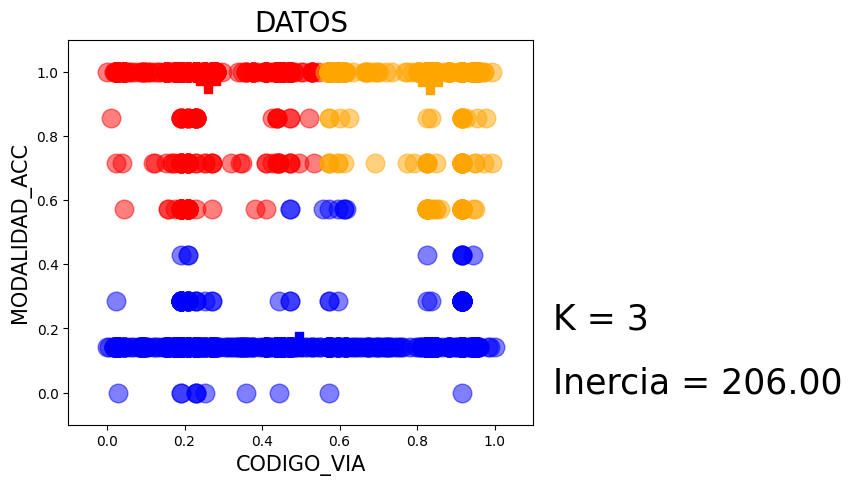

In [20]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(datos[datos["cluster"] == cluster]['CODIGO_VIA'],
                datos[datos["cluster"] == cluster]['MODALIDAD_ACC'],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

plt.title("DATOS", fontsize=20)
plt.xlabel("CODIGO_VIA", fontsize=15)
plt.ylabel("MODALIDAD_ACC", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()


In [21]:
X = df[['FECHA_ACC','MODALIDAD_ACC','CANT_FALLECIDOS' ,'CANT_HERIDOS','CODIGO_VIA','TURNOS_ACC']]
X

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC
0,202001,7,0,0,35,3
1,202001,1,0,1,79,1
3,202001,1,0,1,85,3
4,202001,7,1,1,164,3
6,202001,1,1,1,90,2
...,...,...,...,...,...,...
3827,202111,7,0,1,35,3
3828,202111,5,1,1,89,3
3829,202111,1,0,0,35,3
3830,202111,0,1,0,46,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

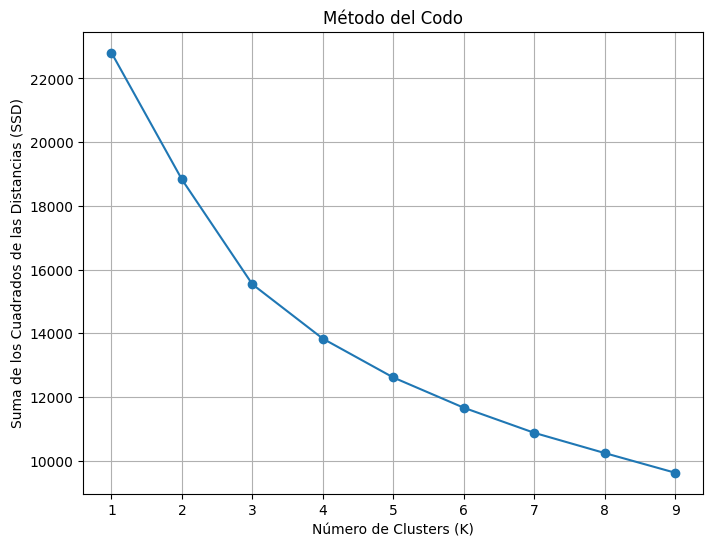

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
ssd = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)

    ssd.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de los Cuadrados de las Distancias (SSD)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [23]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
model= kmeans.labels_
model

array([0, 2, 2, ..., 0, 1, 1], dtype=int32)

In [25]:
df['cluster'] = model
df

,FECHA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,TURNOS_ACC,cluster
0,202001,7,0,0,35,3,0
1,202001,1,0,1,79,1,2
3,202001,1,0,1,85,3,2
4,202001,7,1,1,164,3,1
6,202001,1,1,1,90,2,1
...,...,...,...,...,...,...,...
3827,202111,7,0,1,35,3,2
3828,202111,5,1,1,89,3,1
3829,202111,1,0,0,35,3,0
3830,202111,0,1,0,46,2,1


In [26]:
from matplotlib.colors import ListedColormap

colormap=ListedColormap(['Red','Green','Blue'])

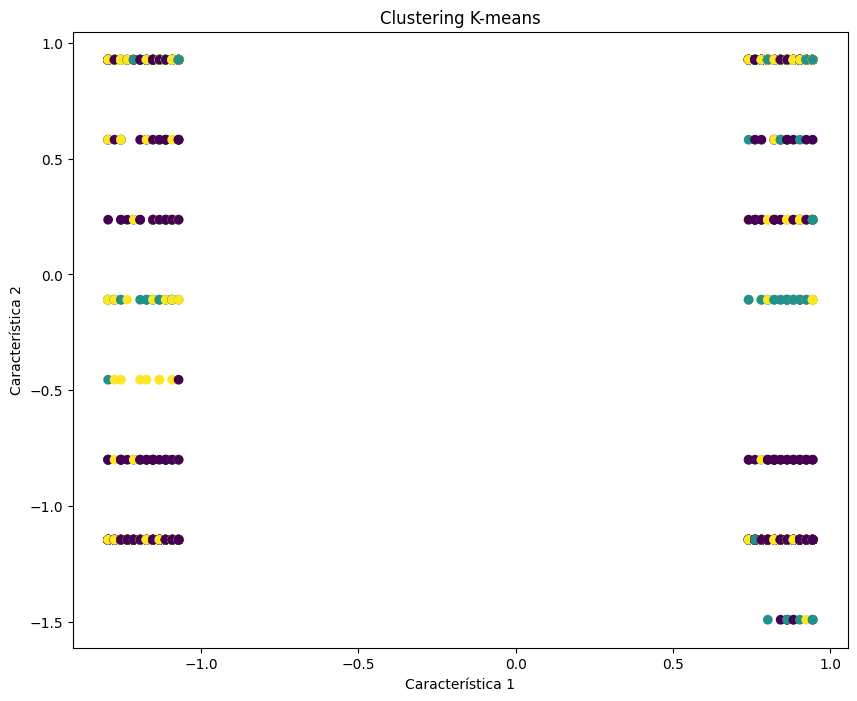

In [27]:
# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=model, cmap='viridis')
plt.title('Clustering K-means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

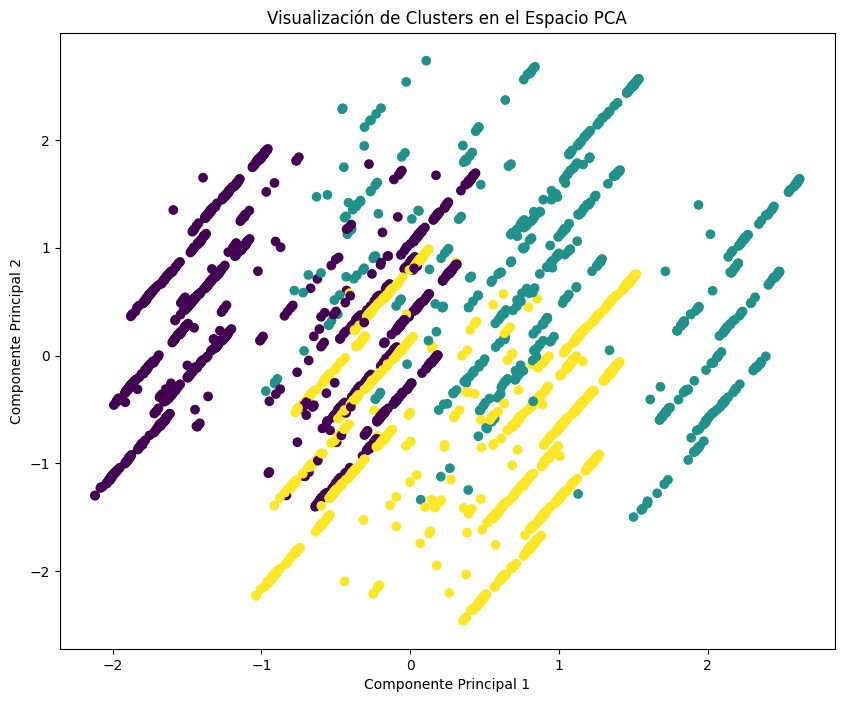

In [28]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los clusters en el espacio PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model, cmap='viridis')
plt.title('Visualización de Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

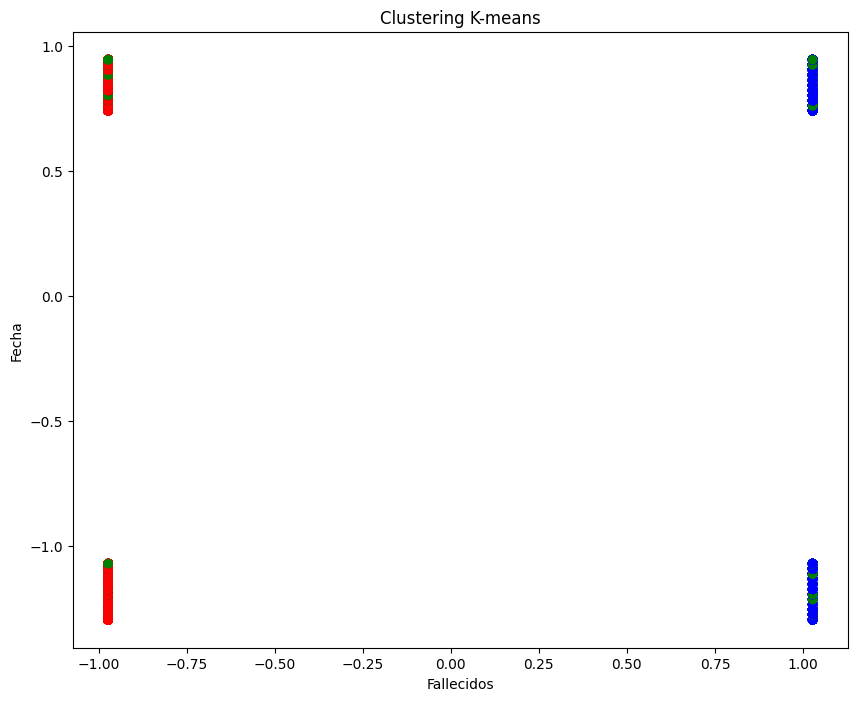

In [29]:
# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:,3], X_scaled[:,0], c=model, cmap=colormap)
plt.title('Clustering K-means')
plt.ylabel('Fecha')
plt.xlabel('Fallecidos')
plt.show()

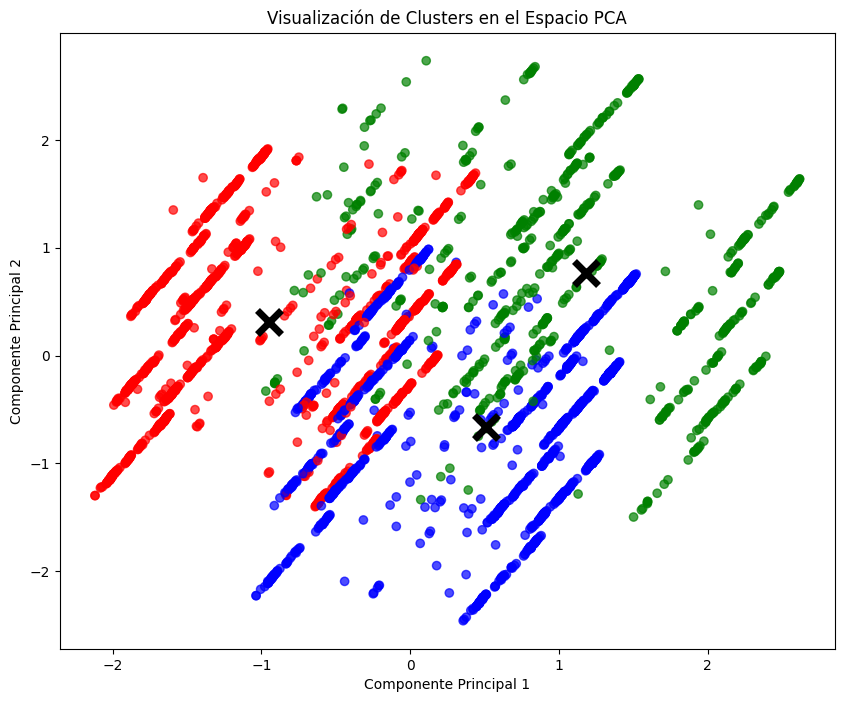

In [37]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca_clusters = pca.transform(kmeans.cluster_centers_)

# Visualizar los clusters en el espacio PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model, cmap=colormap, alpha=0.7)
plt.scatter(X_pca_clusters[:, 0], X_pca_clusters[:, 1], marker='x', s=300, linewidths=5, color='black', zorder=10)
plt.title('Visualización de Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [38]:
kmeans.cluster_centers_

array([[-0.02503199, -0.32293885, -0.45502731, -0.97325927, -0.04642221,
         0.00324697],
       [ 0.043466  ,  0.32112888,  2.19767027,  0.03631392,  0.06522827,
         0.0698437 ],
       [ 0.00818242,  0.20834957, -0.45502731,  1.02747544,  0.02177167,
        -0.03343908]])

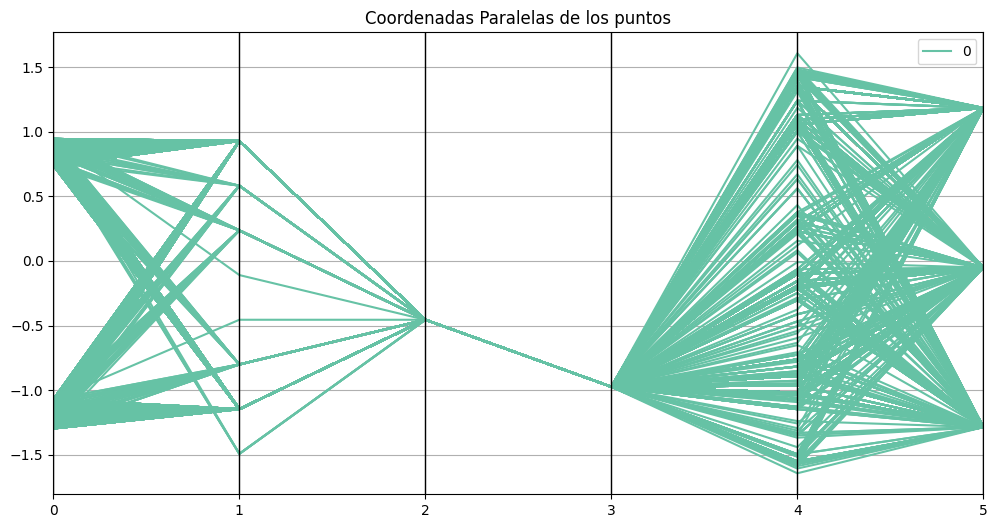

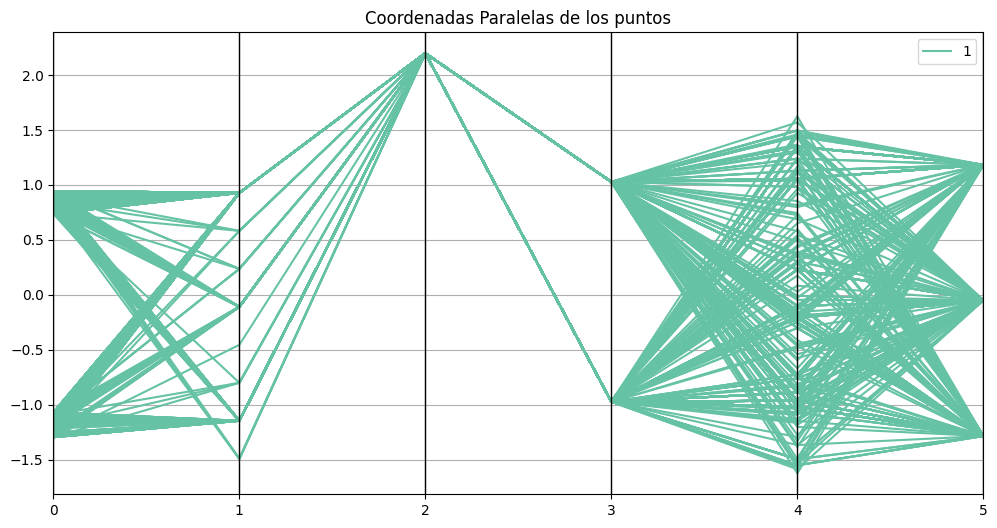

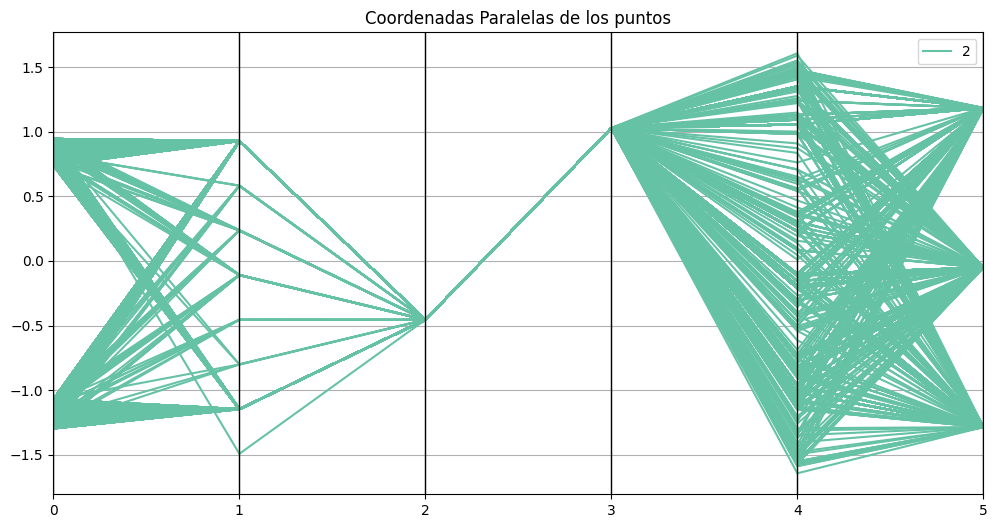

In [49]:
from pandas.plotting import parallel_coordinates

# Función para mostrar coordenadas paralelas para cada cluster
def display_parallel_coordinates(data, num_clusters):
    for cluster in range(num_clusters):
        plt.figure(figsize=(12, 6))
        # Asegúrate de que la columna 'cluster' sea de tipo entero
        data['cluster'] = data['cluster'].astype(int)
        parallel_coordinates(data[data["cluster"] == cluster], class_column='cluster', colormap=plt.get_cmap("Set2"))
        plt.title(f'Cluster {cluster}')
        plt.title('Coordenadas Paralelas de los puntos')
        plt.show()

X_clustered = pd.DataFrame(X_scaled)
X_clustered["cluster"] = model

# Mostrar gráficos de coordenadas paralelas, uno para cada cluster
display_parallel_coordinates(X_clustered, 3)
